# PC Test Environ Maker

In [1]:
import time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tangle import Tangle, node_graph, watcher, analyser
from PC_classes import mal_node

plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)

## Experiment 1

This is a test experiment, I didn't need to actually make a conflicting transaction here as we aren't monitoring the orphan status of the original transaction. We are instead measuring the number of tip confirmations.

This experiment will test the number of tip confirmations of a system built with a parasite chain and a system with the same number of transactions without the parastie chain.

### PC Tangle CLength = 10

Here I declare the node graph used for the experiments. In this case it is 4 normal nodes and one malicious node.

Next I design the transactions in the series. As this is a low load tangle I add a wait time based on the rate of the tangle (in this case 3) to ensure the rate of transactions (and therefore confirmations) is slower. The simulation is then ran for a minute. The output will be recorded in csv files and output.

In [2]:
for trial in range(1,101):
    ### Instantiating all the classes   ###
    t = Tangle(rate=3, tip_selection='mcmc', plot=True)
    ng = node_graph(t)
    w = watcher(t, ng, trial)

    ### Adding nodes to the node graph  ###
    for n in range(4):
        ng.new_node()
    ng.new_node(mal=True, watch=w)

    ### Adding Transactions ###

    for j in range(2):
        for i in range(4):
            ng.nodes[i].issue_transaction()
            w.update()
    
    ### Adding the PC   ###

    ng.nodes[-1].issue_bad_transaction()
    PC_issue_time = t.time                  # This was added to keep track of when the transaction is added.
    w.PC_add_time = t.time
    w.update()
    ng.nodes[-1].spam_transactions(10)
    badNode = ng.nodes[-1]
    print(badNode.chain)

    ### Running the simulation  ###

    while t.time < 60:
        node = np.random.randint(0, 4)
        dt_time = np.random.exponential(1.0/t.rate)
        t.time += dt_time
        ng.nodes[node].issue_transaction()
        w.update()
        print(t.time)

    w.output_to_sheet()



First node
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001542D6538F0>]
Edges []
Node IDS [0]
Weights [[0, 171, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001542D6538F0>, <tangle.node object at 0x000001544CA889B0>]
Edges [(1, 0)]
Node IDS [0, 1]
Weights [[0, 171, 1], [1, 1688, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001542D6538F0>, <tangle.node object at 0x000001544CA889B0>, <tangle.node object at 0x000001544CA6E240>]
Edges [(1, 0), (2, 1), (2, 0)]
Node IDS [0, 1, 2]
Weights [[0, 171, 1], [1, 1688, 1], [2, 925, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x000001542D6538F0>, <tangle.node object at 0x000001544CA889B0>, <tangle.node object at 0x000001544CA6E240>, <tangle.node object at 0x000001542D653C80>]
Edges [(1, 0), (2, 1), (2, 0), (3, 0), (3, 1)]
Node IDS [0, 1, 2, 3]
Weights [[0, 171, 1], [1, 1688, 1], [2, 925, 1], [3, 1283, 1]]
Finished up

In [3]:
for x in t.transactions:
    t.printTransactionStats(x)

------------
Transaction number 0
Transaction Content 0
Node Weight 1
Confirmed Status True
Weight  24
------------
Transaction number 1
Transaction Content 69
Node Weight 1
Confirmed Status True
Weight  37
------------
Transaction number 2
Transaction Content 90
Node Weight 1
Confirmed Status True
Weight  36
------------
Transaction number 3
Transaction Content 50
Node Weight 1
Confirmed Status True
Weight  35
------------
Transaction number 4
Transaction Content 13
Node Weight 1
Confirmed Status True
Weight  56
------------
Transaction number 5
Transaction Content 27
Node Weight 1
Confirmed Status True
Weight  57
------------
Transaction number 6
Transaction Content 81
Node Weight 1
Confirmed Status True
Weight  56
------------
Transaction number 7
Transaction Content 44
Node Weight 1
Confirmed Status True
Weight  55
------------
Transaction number 8
Transaction Content 23
Node Weight 1
Confirmed Status True
Weight  43
------------
Transaction number 9
Transaction Content 82
Node Wei

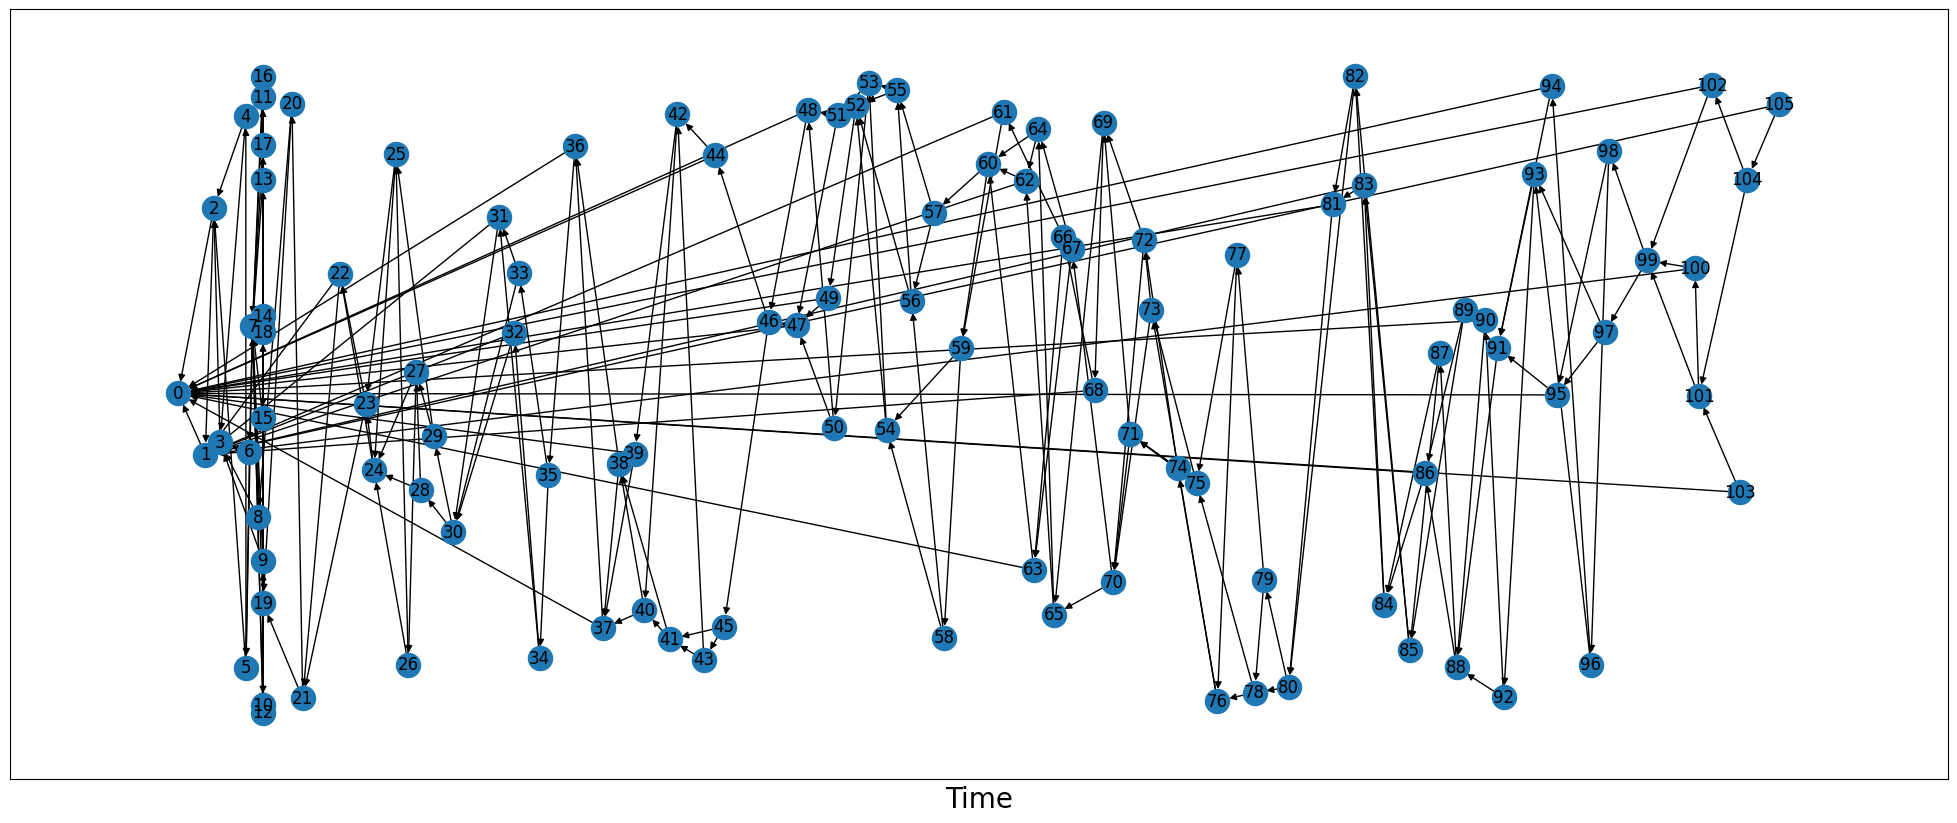

In [4]:
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.figure(figsize=(25, 10))
t.plot()

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 15, 15, 17, 17, 18, 19, 20, 20, 20, 20, 24, 27, 27, 27, 27, 30, 31, 32, 32, 33, 33, 36, 37, 38, 38, 38, 41, 42, 42, 43, 43, 44, 46, 47, 48, 49, 49, 50, 51, 53, 54, 54, 55, 57, 57, 58, 59, 59, 60, 61, 61, 61, 62, 62, 64, 67, 71, 71, 72, 73, 73, 75, 76, 77, 78, 80, 81, 82, 82, 82, 84, 85, 85, 86, 87, 88, 90, 90, 90, 92, 92, 93, 94, 97, 97, 98] [1.0, 1.025363798816949, 1.3480612232503235, 1.5835740086686065, 2.5571146246905747, 2.5630510584173125, 2.6956298531375236, 2.8081961571593985, 3.031249217387749, 3.2074961222593497, 3.2074961222593497, 3.2074961222593497, 3.2074961222593497, 3.2074961222593497, 3.2074961222593497, 3.2074961222593497, 3.2074961222593497, 3.2074961222593497, 3.2074961222593497, 3.2074961222593497, 4.300447037093742, 4.70746315306877, 6.119402521926038, 7.096165172600733, 7.401152305040831, 8.229229989585528, 8.697967444182984, 8.99587133638475, 9.167099990876856, 9.655295265230095, 10.403304040644658, 12.

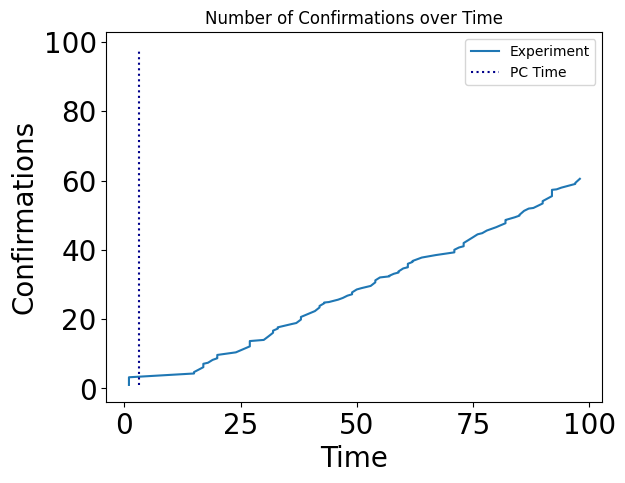

In [5]:
w.plot_confirm_over_time()
print(w.PC_add_time)

In [6]:
a = analyser()
results = a.get_res(100)

[[1, 1.0, 252], [2, 1.0, 271], [3, 1.0375426621160408, 586], [4, 1.5341506129597198, 571], [5, 2.958715596330275, 436], [6, 6.870646766169155, 201], [7, 9.375, 192], [8, 13.243243243243244, 148], [9, 15.572463768115941, 138], [10, 16.77777777777778, 162], [11, 19.14375, 160], [12, 21.34722222222222, 144], [13, 23.546762589928058, 139], [14, 24.819875776397517, 161], [15, 26.87837837837838, 148], [16, 28.397058823529413, 136], [17, 30.41025641025641, 156], [18, 31.881944444444443, 144], [19, 33.3875, 160], [20, 35.11538461538461, 156], [21, 36.9271523178808, 151], [22, 38.46341463414634, 164], [23, 39.76923076923077, 143], [24, 41.616766467065865, 167], [25, 43.10884353741496, 147], [26, 44.69178082191781, 146], [27, 46.46258503401361, 147], [28, 47.60693641618497, 173], [29, 48.906666666666666, 150], [30, 50.7972972972973, 148], [31, 52.64028776978417, 139], [32, 53.83783783783784, 148], [33, 55.932432432432435, 148], [34, 56.857142857142854, 161], [35, 58.36241610738255, 149], [36, 59

[[1, 1.0, 252], [2, 1.0, 271], [3, 1.0375426621160408, 586], [4, 1.5341506129597198, 571], [5, 2.958715596330275, 436], [6, 6.870646766169155, 201], [7, 9.375, 192], [8, 13.243243243243244, 148], [9, 15.572463768115941, 138], [10, 16.77777777777778, 162], [11, 19.14375, 160], [12, 21.34722222222222, 144], [13, 23.546762589928058, 139], [14, 24.819875776397517, 161], [15, 26.87837837837838, 148], [16, 28.397058823529413, 136], [17, 30.41025641025641, 156], [18, 31.881944444444443, 144], [19, 33.3875, 160], [20, 35.11538461538461, 156], [21, 36.9271523178808, 151], [22, 38.46341463414634, 164], [23, 39.76923076923077, 143], [24, 41.616766467065865, 167], [25, 43.10884353741496, 147], [26, 44.69178082191781, 146], [27, 46.46258503401361, 147], [28, 47.60693641618497, 173], [29, 48.906666666666666, 150], [30, 50.7972972972973, 148], [31, 52.64028776978417, 139], [32, 53.83783783783784, 148], [33, 55.932432432432435, 148], [34, 56.857142857142854, 161], [35, 58.36241610738255, 149], [36, 59

Text(0, 0.5, 'Confirmations')

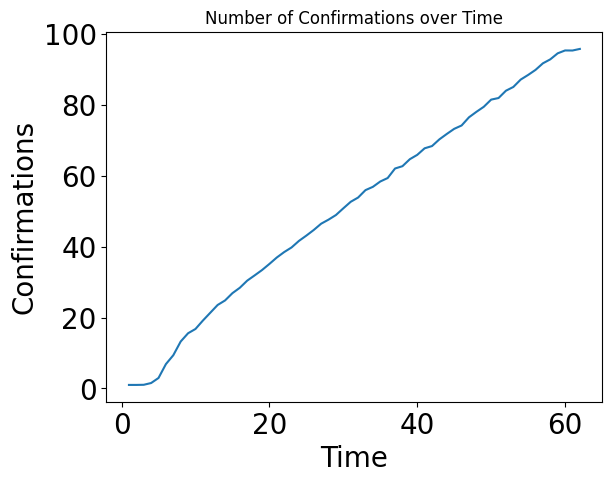

In [7]:
print(results)
df = pd.DataFrame(results)
confirmed = df[1].tolist()
times = df[0].tolist()
plt.plot(times, confirmed)
plt.title('Number of Confirmations over Time')
plt.xlabel('Time')
plt.ylabel('Confirmations')

In [9]:
print(t.chain_attach_point)
t.printTransactionStats(t.chain_attach_point)

<Transaction 7>
------------
Transaction number 7
Transaction Content 44
Node Weight 1
Confirmed Status True
Weight  55


In [18]:
#df.to_csv("pc-r3-c10 100")

100 tests were run and preliminary results show a difference in the early PC attachment approval rate at chain length 10.

### PC Tangle CLength = 20

In [2]:
for trial in range(1,101):
    ### Instantiating all the classes   ###
    t = Tangle(rate=3, tip_selection='mcmc', plot=True)
    ng = node_graph(t)
    w = watcher(t, ng, trial)

    ### Adding nodes to the node graph  ###
    for n in range(4):
        ng.new_node()
    ng.new_node(mal=True, watch=w)

    ### Adding Transactions ###

    for j in range(2):
        for i in range(4):
            ng.nodes[i].issue_transaction()
            w.update()
    
    ### Adding the PC   ###

    ng.nodes[-1].issue_bad_transaction()
    PC_issue_time = t.time                  # This was added to keep track of when the transaction is added.
    w.PC_add_time = t.time
    w.update()
    ng.nodes[-1].spam_transactions(20)
    badNode = ng.nodes[-1]
    print(badNode.chain)

    ### Running the simulation  ###

    while t.time < 60:
        node = np.random.randint(0, 4)
        dt_time = np.random.exponential(1.0/t.rate)
        t.time += dt_time
        ng.nodes[node].issue_transaction()
        w.update()
        print(t.time)

    w.output_to_sheet()

First node
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x0000020057596870>]
Edges []
Node IDS [0]
Weights [[0, 818, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x0000020057596870>, <tangle.node object at 0x0000020058C30D40>]
Edges [(1, 0)]
Node IDS [0, 1]
Weights [[0, 818, 1], [1, 273, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x0000020057596870>, <tangle.node object at 0x0000020058C30D40>, <tangle.node object at 0x00000200591C5A00>]
Edges [(1, 0), (2, 1), (2, 0)]
Node IDS [0, 1, 2]
Weights [[0, 818, 1], [1, 273, 1], [2, 1457, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x0000020057596870>, <tangle.node object at 0x0000020058C30D40>, <tangle.node object at 0x00000200591C5A00>, <tangle.node object at 0x000002005924A810>]
Edges [(1, 0), (2, 1), (2, 0), (3, 2), (3, 1)]
Node IDS [0, 1, 2, 3]
Weights [[0, 818, 1], [1, 273, 1], [2, 1457, 1], [3, 1462, 1]]
Finished upd

[1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 12, 12, 18, 23, 23, 23, 24, 28, 30, 30, 32, 34, 34, 35, 35, 35, 38, 38, 41, 41, 41, 43, 46, 48, 50, 50, 50, 50, 51, 53, 54, 56, 56, 56, 58, 59, 60, 60, 62, 64, 66, 67, 67, 68, 70, 71, 72, 72, 74, 76, 76, 77, 78, 80, 81, 81, 84, 85, 85, 86, 87, 88, 89, 89, 89, 90, 90, 95, 96, 96, 96, 96, 97, 97, 98, 98, 98, 98, 99, 103, 105] [1.0, 1.172705670508407, 1.2708870139425448, 1.4669242163308207, 1.5626864957589366, 1.7122981095567515, 2.120780616191934, 2.5551369327445226, 2.6117814851700656, 4.064193623878422, 4.064193623878422, 4.064193623878422, 4.064193623878422, 4.064193623878422, 4.064193623878422, 4.064193623878422, 4.064193623878422, 4.064193623878422, 4.064193623878422, 4.064193623878422, 4.064193623878422, 4.064193623878422, 4.064193623878422, 4.064193623878422, 4.064193623878422, 4.064193623878422, 4.064193623878422, 4.064193623878422, 4.064193623878422, 4.064193623878422, 4.388073692494

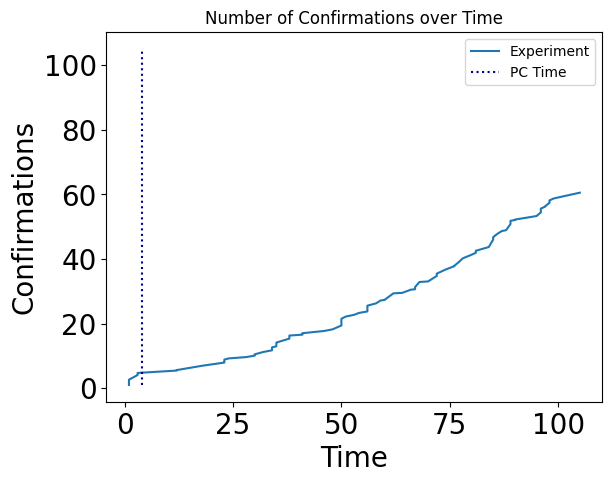

In [3]:
w.plot_confirm_over_time()
print(w.PC_add_time)

In [4]:
a = analyser()
results = a.get_res(100)

[[1, 1.0, 249], [2, 1.0, 365], [3, 1.2315068493150685, 730], [4, 1.6577981651376146, 1090], [5, 3.351503759398496, 532], [6, 8.364583333333334, 288], [7, 13.565853658536586, 205], [8, 21.609756097560975, 164], [9, 24.093023255813954, 129], [10, 26.23728813559322, 177], [11, 28.91780821917808, 146], [12, 30.482517482517483, 143], [13, 32.308724832214764, 149], [14, 34.0728476821192, 151], [15, 35.87248322147651, 149], [16, 37.913333333333334, 150], [17, 39.72727272727273, 165], [18, 40.82876712328767, 146], [19, 42.467532467532465, 154], [20, 43.92307692307692, 156], [21, 45.62732919254658, 161], [22, 47.26865671641791, 134], [23, 49.08974358974359, 156], [24, 50.16770186335404, 161], [25, 52.642857142857146, 140], [26, 53.98684210526316, 152], [27, 54.956204379562045, 137], [28, 56.47239263803681, 163], [29, 57.39310344827586, 145], [30, 59.51677852348993, 149], [31, 60.758389261744966, 149], [32, 62.72784810126582, 158], [33, 64.16326530612245, 147], [34, 65.62987012987013, 154], [35,

[[1, 1.0, 249], [2, 1.0, 365], [3, 1.2315068493150685, 730], [4, 1.6577981651376146, 1090], [5, 3.351503759398496, 532], [6, 8.364583333333334, 288], [7, 13.565853658536586, 205], [8, 21.609756097560975, 164], [9, 24.093023255813954, 129], [10, 26.23728813559322, 177], [11, 28.91780821917808, 146], [12, 30.482517482517483, 143], [13, 32.308724832214764, 149], [14, 34.0728476821192, 151], [15, 35.87248322147651, 149], [16, 37.913333333333334, 150], [17, 39.72727272727273, 165], [18, 40.82876712328767, 146], [19, 42.467532467532465, 154], [20, 43.92307692307692, 156], [21, 45.62732919254658, 161], [22, 47.26865671641791, 134], [23, 49.08974358974359, 156], [24, 50.16770186335404, 161], [25, 52.642857142857146, 140], [26, 53.98684210526316, 152], [27, 54.956204379562045, 137], [28, 56.47239263803681, 163], [29, 57.39310344827586, 145], [30, 59.51677852348993, 149], [31, 60.758389261744966, 149], [32, 62.72784810126582, 158], [33, 64.16326530612245, 147], [34, 65.62987012987013, 154], [35,

Text(0, 0.5, 'Confirmations')

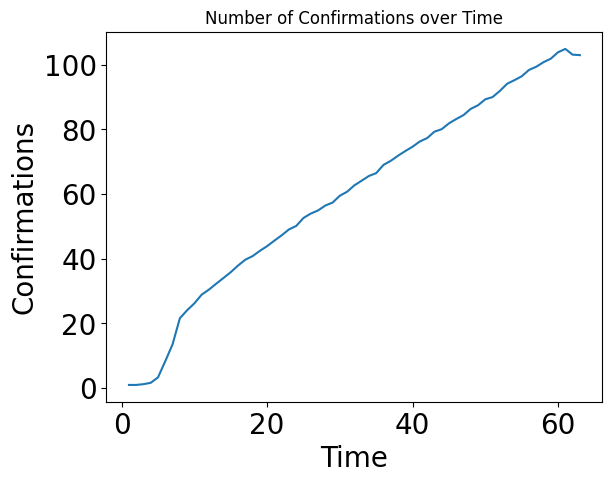

In [5]:
print(results)
df = pd.DataFrame(results)
confirmed = df[1].tolist()
times = df[0].tolist()
plt.plot(times, confirmed)
plt.title('Number of Confirmations over Time')
plt.xlabel('Time')
plt.ylabel('Confirmations')

In [6]:
df.to_csv("pc-r3-c20 100")

## Clength = 5

In [2]:
for trial in range(1,101):
    ### Instantiating all the classes   ###
    t = Tangle(rate=3, tip_selection='mcmc', plot=True)
    ng = node_graph(t)
    w = watcher(t, ng, trial)

    ### Adding nodes to the node graph  ###
    for n in range(4):
        ng.new_node()
    ng.new_node(mal=True, watch=w)

    ### Adding Transactions ###

    for j in range(2):
        for i in range(4):
            ng.nodes[i].issue_transaction()
            w.update()
    
    ### Adding the PC   ###

    ng.nodes[-1].issue_bad_transaction()
    PC_issue_time = t.time                  # This was added to keep track of when the transaction is added.
    w.PC_add_time = t.time
    w.update()
    ng.nodes[-1].spam_transactions(5)
    badNode = ng.nodes[-1]
    print(badNode.chain)

    ### Running the simulation  ###

    while t.time < 60:
        node = np.random.randint(0, 4)
        dt_time = np.random.exponential(1.0/t.rate)
        t.time += dt_time
        ng.nodes[node].issue_transaction()
        w.update()
        print(t.time)

    w.output_to_sheet()

First node
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x00000204FFC7DB50>]
Edges []
Node IDS [0]
Weights [[0, 446, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x00000204FFC7DB50>, <tangle.node object at 0x000002048D383B30>]
Edges [(1, 0)]
Node IDS [0, 1]
Weights [[0, 446, 1], [1, 1316, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x00000204FFC7DB50>, <tangle.node object at 0x000002048D383B30>, <tangle.node object at 0x00000204FFD49790>]
Edges [(1, 0), (2, 0), (2, 1)]
Node IDS [0, 1, 2]
Weights [[0, 446, 1], [1, 1316, 1], [2, 973, 1]]
Finished updating
-------------------
Nodes RAW [<tangle.node object at 0x00000204FFC7DB50>, <tangle.node object at 0x000002048D383B30>, <tangle.node object at 0x00000204FFD49790>, <tangle.node object at 0x000002048DAE7170>]
Edges [(1, 0), (2, 0), (2, 1), (3, 2), (3, 1)]
Node IDS [0, 1, 2, 3]
Weights [[0, 446, 1], [1, 1316, 1], [2, 973, 1], [3, 1752, 1]]
Finished up

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 5, 5, 5, 5, 5, 5, 7, 9, 9, 12, 12, 12, 15, 16, 18, 19, 19, 20, 20, 23, 23, 25, 27, 29, 29, 29, 30, 31, 31, 32, 32, 33, 34, 35, 36, 37, 39, 39, 40, 42, 43, 44, 45, 45, 45, 47, 48, 48, 48, 49, 49, 51, 52, 53, 54, 56, 56, 56, 57, 57, 60, 60, 63, 63, 64, 64, 65, 66, 67, 68, 68, 69, 70, 71, 72, 72, 73, 76, 79, 79, 80, 84, 84, 84, 85, 86, 89] [1.0, 1.0871595870225983, 1.1607577428545393, 1.3082081695549026, 1.4051399627057544, 1.44600593561986, 1.5362471820513095, 1.7237607283145089, 2.072128370763852, 2.256009414326814, 2.282302484505806, 2.64004545570797, 3.5563674804503074, 4.26246887424112, 4.694897428695438, 5.204155073071668, 5.505360461029032, 5.725185922361821, 5.910986855582118, 6.670124254978621, 6.905623645449024, 8.097404759527096, 8.755202773249533, 9.260269668486172, 9.455043897578916, 10.526022751832475, 11.14326522264224, 12.797648896565768, 13.993044455953754, 14.43134505621121, 15.39809629635803, 15.896832096159168, 17.89574395323666,

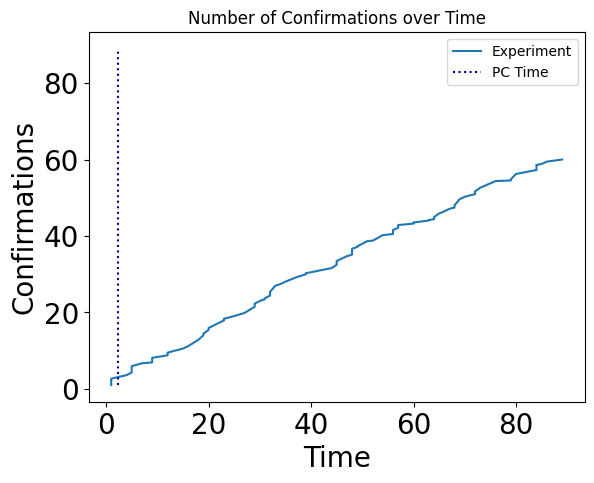

In [3]:
w.plot_confirm_over_time()
print(w.PC_add_time)
a = analyser()
results = a.get_res(100)

[[1, 1.0, 260], [2, 1.0, 291], [3, 1.0506756756756757, 296], [4, 1.4875444839857652, 281], [5, 2.3598326359832638, 239], [6, 3.7708333333333335, 192], [7, 5.977401129943503, 177], [8, 8.129411764705882, 170], [9, 9.458646616541353, 133], [10, 12.233333333333333, 150], [11, 13.648275862068965, 145], [12, 15.430555555555555, 144], [13, 17.123456790123456, 162], [14, 18.51497005988024, 167], [15, 20.033333333333335, 150], [16, 21.595890410958905, 146], [17, 23.34328358208955, 134], [18, 24.313253012048193, 166], [19, 26.10828025477707, 157], [20, 27.782894736842106, 152], [21, 28.992857142857144, 140], [22, 30.493150684931507, 146], [23, 31.854166666666668, 144], [24, 33.50877192982456, 171], [25, 34.967532467532465, 154], [26, 36.696969696969695, 165], [27, 38.07333333333333, 150], [28, 39.73287671232877, 146], [29, 40.625850340136054, 147], [30, 42.736111111111114, 144], [31, 44.0945945945946, 148], [32, 45.52054794520548, 146], [33, 47.12676056338028, 142], [34, 48.324503311258276, 151

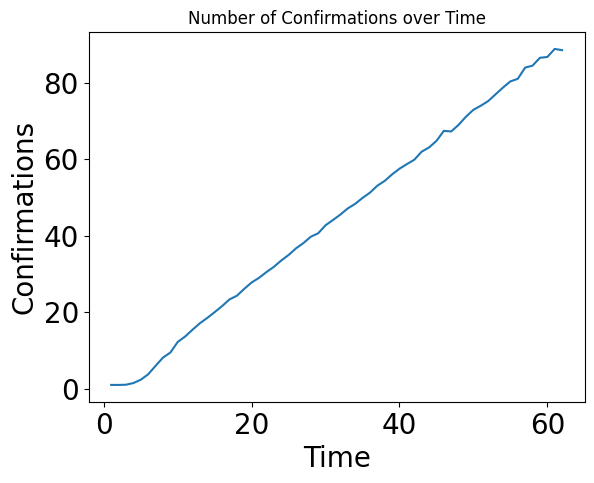

In [4]:
print(results)
df = pd.DataFrame(results)
confirmed = df[1].tolist()
times = df[0].tolist()
plt.plot(times, confirmed)
plt.title('Number of Confirmations over Time')
plt.xlabel('Time')
plt.ylabel('Confirmations')

df.to_csv("pc-r3-c5 100")

In [5]:
print(df)

     0          1    2
0    1   1.000000  260
1    2   1.000000  291
2    3   1.050676  296
3    4   1.487544  281
4    5   2.359833  239
..  ..        ...  ...
57  58  84.446043  139
58  59  86.509804  153
59  60  86.715447  123
60  61  88.822222   45
61  62  88.500000    4

[62 rows x 3 columns]
